In [3]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [4]:
import os
from datetime import datetime

# Replace 'base_directory_path' with the base path where your directories are located

# Define the date and time format that your directories are using
# This should match the format used when creating the directories
date_time_format = '%Y%m%d-%H%M%S'
def get_directories(base_path):
    """Get a list of all directories in the base path."""
    return [d for d in os.listdir(base_path) if os.path.isdir(os.path.join(base_path, d))]
def filter_directories_by_date(directories, date_format):
    """Filter out directories that match the date and time pattern."""
    filtered_directories = []
    for directory in directories:
        try:
            # If the directory name can be parsed into a datetime object, it matches the pattern
            datetime.strptime(directory, date_format)
            filtered_directories.append(directory)
        except ValueError:
            # If a ValueError is raised, it means the directory name doesn't match the pattern
            continue
    return filtered_directories
def find_most_recent_directory(base_path,directories, date_format):
    """Find the most recent directory based on the date and time pattern."""
    if not directories:
        return None
    # Parse the directory names to get the corresponding datetime objects
    dates = [datetime.strptime(directory, date_format) for directory in directories]
    # Get the most recent date
    most_recent_date = max(dates)
    # Find the directory that corresponds to the most recent date
    most_recent_directory = directories[dates.index(most_recent_date)]
    return os.path.join(base_path, most_recent_directory)


In [5]:
scenario = 'simple_push'

base_directory_path = f"./learning_curves/{scenario}"
directories = get_directories(base_directory_path)
date_directories = filter_directories_by_date(directories, date_time_format)
most_recent_directory = find_most_recent_directory(base_directory_path, date_directories, date_time_format)
# Load the data from .pkl files
with open(os.path.join(most_recent_directory, 'test_rewards.pkl'), 'rb') as f:
    rewards = pickle.load(f)

with open(os.path.join(most_recent_directory, 'test_agrewards.pkl'), 'rb') as f:
    agrewards = pickle.load(f)

In [6]:

# Convert the data to numpy arrays
slow_rewards_array = np.array(rewards)
slow_agrewards_array = np.array(agrewards)

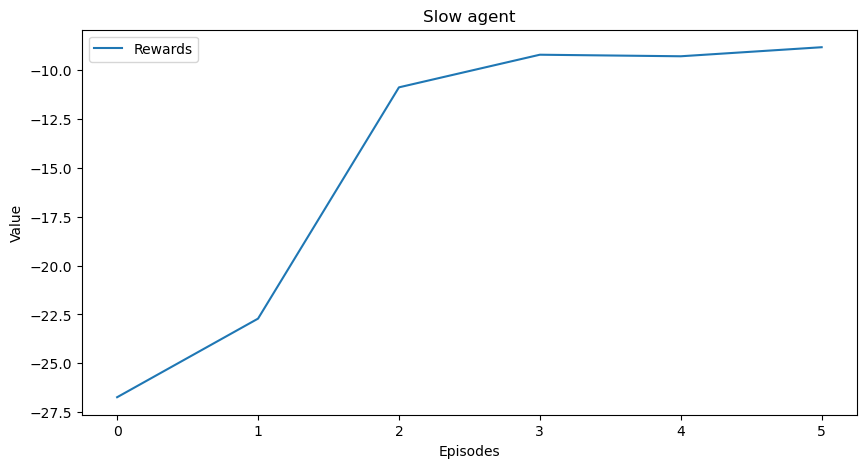

In [7]:

# Now you can plot the data
# For example, plot the rewards
plt.figure(figsize=(10, 5))
plt.plot(slow_rewards_array, label='Rewards')
# plt.plot(slow_agrewards_array, label='Aggregated Rewards')
# plt.ylim(-20,0)
plt.legend()
plt.xlabel('Episodes')
plt.ylabel('Value')
plt.title('Slow agent')
plt.show()